In [45]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("Dataset of Diabetes .csv")

In [176]:
df.sample(10)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
171,231,14389,F,50,4.0,56,13.7,4.4,2.0,1.0,2.50,0.9,29.0,Y
678,465,34484,F,56,2.3,22,10.2,5.8,2.0,1.1,1.80,0.9,27.0,Y
560,267,34436,M,55,2.6,48,11.8,5.1,1.2,1.0,3.60,0.5,33.0,Y
686,473,34490,M,60,5.0,55,10.0,4.5,1.3,0.9,3.00,0.6,33.0,Y
910,76,8978,M,60,5.4,64,10.4,3.8,1.5,0.8,2.30,0.6,31.0,Y
985,188,454316,F,75,10.3,113,8.6,4.2,1.6,0.9,2.60,0.7,32.0,Y
383,372,34355,F,54,3.5,66,8.0,4.8,2.0,2.4,1.60,0.9,33.0,Y
939,114,45643,M,60,5.3,62,10.2,4.1,3.8,1.1,1.35,0.6,31.0,Y
632,121,48925,M,76,5.9,56,10.9,4.6,7.0,0.6,1.30,3.1,33.0,Y
130,686,87659,F,33,2.7,47,6.0,4.2,1.4,1.3,2.60,0.7,24.0,P


In [178]:
df['CLASS'].unique()  

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [49]:
df['CLASS'] = df['CLASS'].str.strip()

In [182]:
df['CLASS'].unique()  

array(['N', 'P', 'Y'], dtype=object)

In [51]:
encoder = LabelEncoder()
df['CLASS'] = encoder.fit_transform(df['CLASS'])

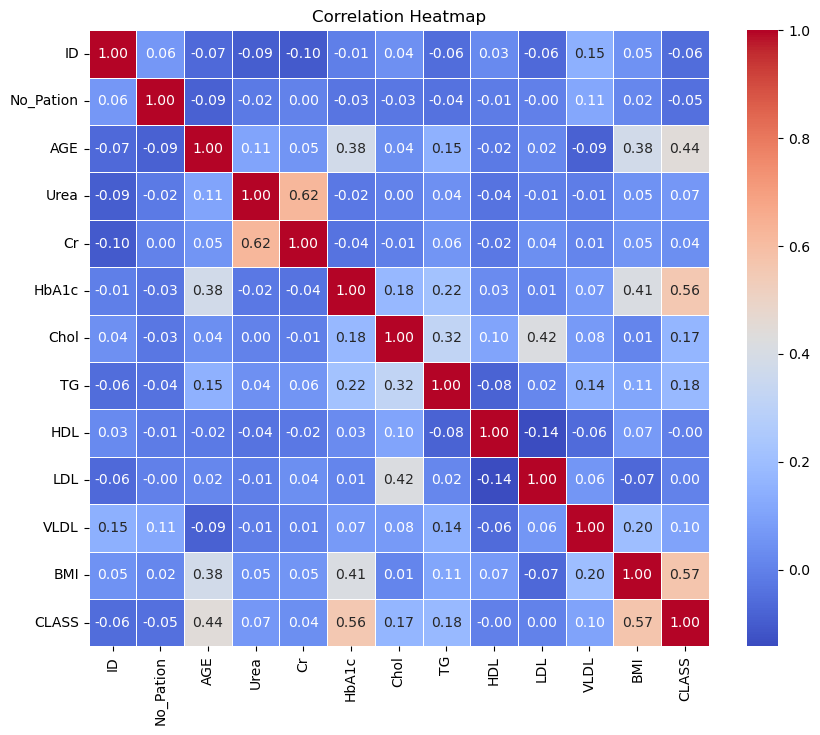

In [139]:
# Step 2: Compute correlation matrix
corr = df.corr(numeric_only=True)  # Only uses numeric columns

# Step 3: Create heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Step 4: Show plot
plt.title("Correlation Heatmap")
plt.show()

In [53]:
df = df[['HbA1c','BMI', 'CLASS']]
df['CLASS'].value_counts()

CLASS
2    844
0    103
1     53
Name: count, dtype: int64

In [55]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [73]:
X.head()

,HbA1c,BMI
0,4.9,24.0
1,4.9,23.0
2,4.9,24.0
3,4.9,24.0
4,4.9,21.0


In [213]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int32

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [63]:
model = OneVsRestClassifier(LogisticRegression(max_iter=500))
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=500))

In [67]:
y_pred = model.predict(X_test)

In [69]:
print(accuracy_score(y_test, y_pred))

0.93


In [238]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,16,0,0
1,1,0,6
2,6,1,170


C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


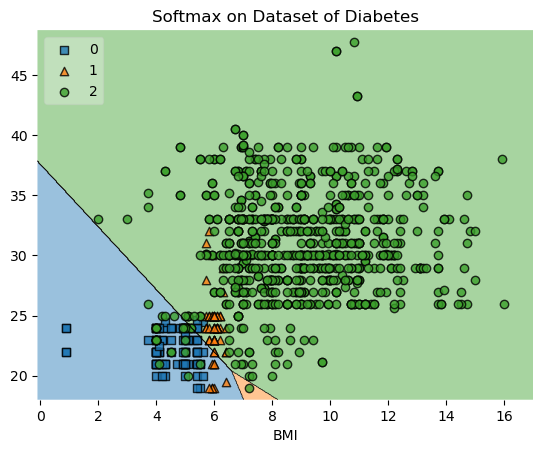

In [75]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, model, legend=2)
plt.xlabel('HbA1c')
plt.xlabel('BMI')
plt.title('Softmax on Dataset of Diabetes')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [19]:
model2= make_pipeline(
    StandardScaler(),
    LogisticRegression(
        solver='lbfgs',         # Supports softmax (multinomial loss)
        max_iter=1000           # Increase to ensure convergence
        # Do NOT set multi_class — default is 'multinomial' in new versions
    )
)


In [21]:
model2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [37]:
y_pred2 = model2.predict(X_test)

In [39]:
print(accuracy_score(y_test, y_pred2))

0.93


In [ ]:
# Softmax technique by default

In [77]:
model3 = LogisticRegression(solver='lbfgs', max_iter=1000)

In [79]:
model3.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred3 = model3.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_pred3))

0.935


C:\Users\chetn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


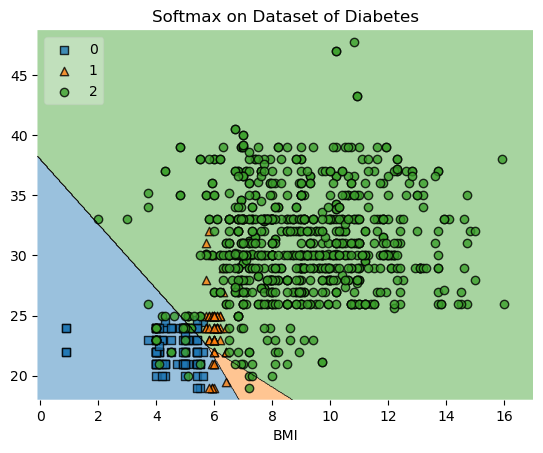

In [85]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, model3, legend=2)
plt.xlabel('Hemoglobin A1c')
plt.xlabel('BMI')
plt.title('Softmax on Dataset of Diabetes')
plt.show()